<a href="https://colab.research.google.com/github/Gary-713/Entropy/blob/main/Animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/vertebrate(4).csv', header='infer')

In [ ]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [ ]:
data['Class']=data['Class'].replace(['reptiles', 'fishes', 'amphibians', 'birds'], 'non-mamals')

In [ ]:
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mamals
2,salmon,0,0,1,0,0,0,non-mamals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mamals
5,komodo,0,0,0,0,1,0,non-mamals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mamals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mamals


In [ ]:
pd.crosstab([data['Warm-blooded'], data['Gives Birth']],data['Class'])

Class                     mammals  non-mamals
Warm-blooded Gives Birth                     
0            0                  0           7
             1                  0           1
1            0                  0           2
             1                  5           0

In [ ]:
from sklearn import tree

In [ ]:
y=data['Class']

In [ ]:
y

0        mammals
1     non-mamals
2     non-mamals
3        mammals
4     non-mamals
5     non-mamals
6        mammals
7     non-mamals
8        mammals
9     non-mamals
10    non-mamals
11    non-mamals
12       mammals
13    non-mamals
14    non-mamals
Name: Class, dtype: object

In [ ]:
X=data.drop(['Name', 'Class'], axis=1)

In [ ]:
X

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [ ]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf=clf.fit(X,y)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
import pydotplus

In [ ]:
from IPython.display import Image

In [ ]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns,
                              class_names=['mamals' ,'non-mamals'],
                              filled=True, rounded=True)

In [ ]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Gives Birth <= 0.5\\nentropy = 0.918\\nsamples = 15\\nvalue = [5, 10]\\nclass = non-mamals", fillcolor="#9ccef2"] ;\n1 [label="entropy = 0.0\\nsamples = 9\\nvalue = [0, 9]\\nclass = non-mamals", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Warm-blooded <= 0.5\\nentropy = 0.65\\nsamples = 6\\nvalue = [5, 1]\\nclass = mamals", fillcolor="#ea9a61"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = non-mamals", fillcolor="#399de5"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 5\\nvalue = [5, 0]\\nclass = mamals", fillcolor="#e58139"] ;\n2 -> 4 ;\n}'

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)

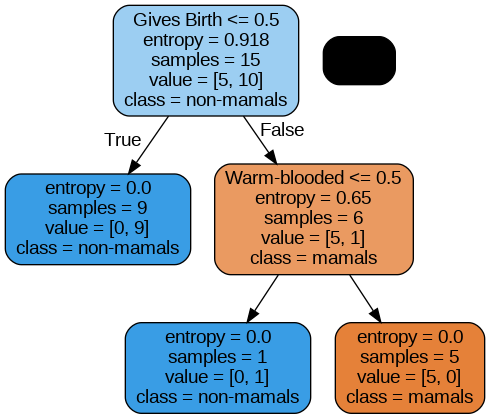

In [ ]:
graph

Image(graph.create_png())

In [ ]:
testdata=[['gila monister', 0, 0, 0, 0, 1, 1, 'non-mamals'],
          ['platypus', 1, 0, 0, 0, 1, 1, 'mamals'],
          ['owl', 1, 0, 0, 1, 1, 0, 'non-mamals'],
          ['dolphin', 1, 1, 1, 0, 0, 0, 'mamals'],]

In [ ]:
testdata

[['gila monister', 0, 0, 0, 0, 1, 1, 'non-mamals'],
 ['platypus', 1, 0, 0, 0, 1, 1, 'mamals'],
 ['owl', 1, 0, 0, 1, 1, 0, 'non-mamals'],
 ['dolphin', 1, 1, 1, 0, 0, 0, 'mamals']]

In [ ]:
data.columns

Index(['Name', 'Warm-blooded', 'Gives Birth', 'Aquatic Creature',
       'Aerial Creature', 'Has Legs', 'Hibernates', 'Class'],
      dtype='object')

In [ ]:
testdata=pd.DataFrame(testdata, columns=data.columns)

In [ ]:
testdata

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monister,0,0,0,0,1,1,non-mamals
1,platypus,1,0,0,0,1,1,mamals
2,owl,1,0,0,1,1,0,non-mamals
3,dolphin,1,1,1,0,0,0,mamals


In [ ]:
testY=testdata['Class']

In [ ]:
testY

0    non-mamals
1        mamals
2    non-mamals
3        mamals
Name: Class, dtype: object

In [ ]:
testX=testdata.drop(['Name', 'Class'], axis=1)

In [ ]:
testX

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,0,0,0,0,1,1
1,1,0,0,0,1,1
2,1,0,0,1,1,0
3,1,1,1,0,0,0


In [ ]:
predY=clf.predict(testX)

In [ ]:
predY

array(['non-mamals', 'non-mamals', 'non-mamals', 'mammals'], dtype=object)

In [ ]:
testY

0    non-mamals
1        mamals
2    non-mamals
3        mamals
Name: Class, dtype: object

In [ ]:
3/4*100

75.0

In [ ]:
predictions=pd.concat([testdata['Name'], testdata['Class'], pd.Series(predY, name='Predicted Class')], axis=1)

In [ ]:
predictions

,Name,Class,Predicted Class
0,gila monister,non-mamals,non-mamals
1,platypus,mamals,non-mamals
2,owl,non-mamals,non-mamals
3,dolphin,mamals,mammals


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(testY, predY)

0.5

In [ ]:
print('Accuracy on the test data is %.2f'%(accuracy_score(testY, predY)))

Accuracy on the test data is 0.50


In [ ]:
data1=pd.read_csv('/content/animals.csv', header='infer')

In [ ]:
data1

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [ ]:
a=data1['Class']

In [ ]:
a

0     1
1     1
2     4
3     1
4     1
     ..
85    7
86    4
87    2
88    6
89    5
Name: Class, Length: 90, dtype: int64

In [ ]:
B=data1.drop(['Sr', 'Class'], axis=1)

In [ ]:
B

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1
88,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0


In [ ]:
clf1=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf1

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf1=clf1.fit(B,a)

In [ ]:
clf1

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
unique_classes = a.unique()

In [ ]:
class_names = [str(cls) for cls in unique_classes]

In [ ]:
relevant_features = B.columns[:6]

In [ ]:
dot_data1 = tree.export_graphviz(clf, feature_names=relevant_features,
                                class_names=class_names,
                                filled=True,
                                rounded=True)

In [ ]:
dot_data1

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=" Feathers <= 0.5\\nentropy = 0.918\\nsamples = 15\\nvalue = [5, 10]\\nclass = 4", fillcolor="#9ccef2"] ;\n1 [label="entropy = 0.0\\nsamples = 9\\nvalue = [0, 9]\\nclass = 4", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=" Hair <= 0.5\\nentropy = 0.65\\nsamples = 6\\nvalue = [5, 1]\\nclass = 1", fillcolor="#ea9a61"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = 4", fillcolor="#399de5"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 5\\nvalue = [5, 0]\\nclass = 1", fillcolor="#e58139"] ;\n2 -> 4 ;\n}'

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)

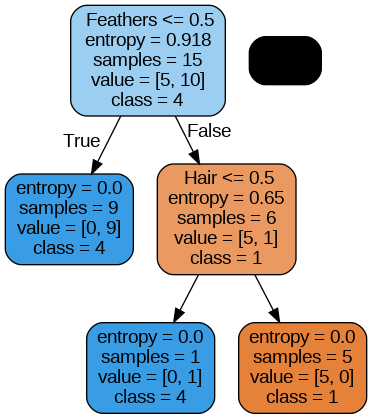

In [ ]:
graph

Image(graph.create_png())

In [ ]:
testdata1=[[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2],
          [2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 4],
          [3, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3],
          [4, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3],]

In [ ]:
data1.columns

Index(['Sr', ' Hair', ' Feathers', ' Eggs', ' Milk', ' Airborne', ' Aquatic',
       ' Predator', ' Teeth', ' Backbone', ' Breathes', ' Venemous', ' Fins',
       ' Legs', ' Tails', ' Domestic', ' Catsize', 'Class'],
      dtype='object')

In [ ]:
testdata1=pd.DataFrame(testdata1, columns=data1.columns)

In [ ]:
testdata1

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,2
1,2,1,0,0,0,1,1,1,0,1,0,1,1,1,1,0,1,4
2,3,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,3
3,4,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,3


In [ ]:
testA=testdata1['Class']

In [ ]:
testA

0    2
1    4
2    3
3    3
Name: Class, dtype: int64

In [ ]:
testB=testdata1.drop(['Sr', 'Class'], axis=1)

In [ ]:
testB

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0
1,1,0,0,0,1,1,1,0,1,0,1,1,1,1,0,1
2,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
3,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
predA=clf1.predict(testB)

In [ ]:
predA

array([4, 7, 1, 1])

In [ ]:
testA

0    2
1    4
2    3
3    3
Name: Class, dtype: int64

In [ ]:
0/4*100

0.0

In [ ]:
prediction=pd.concat([testdata1['Sr'], testdata1['Class'], pd.Series(predA, name='Predicted Class')], axis=1)

In [ ]:
prediction

,Sr,Class,Predicted Class
0,1,2,4
1,2,4,7
2,3,3,1
3,4,3,1


In [ ]:
accuracy_score(testA, predA)

0.0